# Viasampling

En esta parte se traduce el codigo de matlab viasampling.m a lenguaje python explicando qué acciones se realizan desde el punto de vista del análisis de las señales realizadas sobre la imágen.

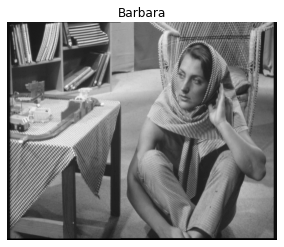

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

# First we import the image and convert it to gray scale
img_array=plt.imread("../../../assets/barbara.gif")
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
#the we show the image
plt.imshow(gray, cmap="gray")
plt.title('Barbara') 
plt.axis('off')
plt.show()

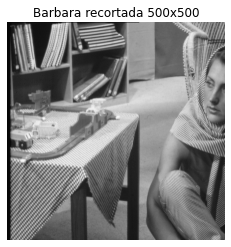

In [3]:
# we gonna work with a piece of the picture
f1 = gray[0:500,0:500]
plt.imshow(f1, cmap="gray")
plt.title('Barbara recortada 500x500') 
plt.axis('off')
plt.show()

### Funcion downsampling

In [4]:
import cv2

def downsampling(I,m,filter):
    N , M = I.shape
    w = 1/m 
    F = np.fft.fftshift(np.fft.fft2(I))
    if filter == 'FILTER_ON':
        for i in range(N):
            for j in range(N):
                r2 = (i-np.round(N/2))**2+(j-np.round(N/2))**2
                if r2>(np.round(N/2*w)**2): 
                    F[i,j] = 0
    
    Idown=np.real(np.fft.ifft2(np.fft.fftshift(F))).astype(np.uint8)
    print("Spatial spectrum frecuency:")
    plt.imshow(np.real(F).astype(np.uint8), cmap="gray")
    plt.title('Spectrum') 
    plt.axis('off')
    plt.show()
    return cv2.resize(Idown,dsize=(int(N/m),int(N/m)));
    

## Downsampling

A continuación implementaremos un downsampling de la imágen sin implementar un filtro intermedio

Spatial spectrum frecuency:


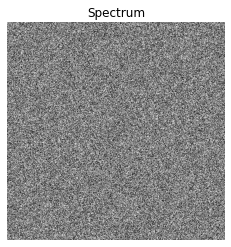

In [5]:
f2 = downsampling(f1, 2, 'FILTER_OFF')

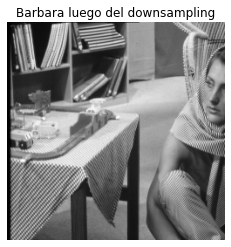

In [6]:
plt.imshow(f2, cmap="gray")
plt.title('Barbara luego del downsampling') 
plt.axis('off')
plt.show()

## Downsampling con filtro pasa bajos

A continuación se implementará el downsampling con el filtro pasa bajos previamente implementado para evitar el aliasing en la imágen.

Spatial spectrum frecuency:


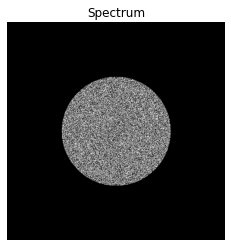

In [7]:
f2_filter_on = downsampling(f1, 2, 'FILTER_ON');

En la imágen superior se puede ver el espectro de frecuencias espaciales que muestra cómo funciona el filtro pasabajos

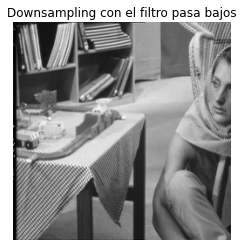

In [7]:
plt.imshow(f2_filter_on, cmap="gray")
plt.title('Downsampling con el filtro pasa bajos') 
plt.axis('off')
plt.show()

### Funcion Upsampling

In [8]:
def upsampling(I, m):
    N, M = I.shape
    Iup = np.zeros((m*N, m*N))
    for i in range(N):
        for j in range(N):
            Iup[m*i, m*j] = I[i,j]
    N, M = Iup.shape
    w = 1/m
    F = np.fft.fftshift(np.fft.fft2(Iup))
    for i in range(N):
        for j in range(N):
            r2 = (i-np.round(N/2))**2+(j-np.round(N/2))**2
            if r2>(np.round(N/2*w)**2): 
                F[i,j] = 0
    return (m*m)*abs(np.fft.ifft2(np.fft.fftshift(F)))

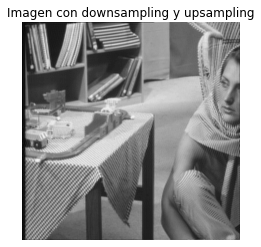

In [9]:
f3 = upsampling(f2,2)
plt.imshow(f3, cmap="gray")
plt.title('Imagen con downsampling y upsampling') 
plt.axis('off')
plt.show()

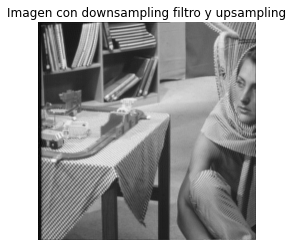

In [10]:
f3_filter_on = upsampling(f2_filter_on,2)
plt.imshow(f3, cmap="gray")
plt.title('Imagen con downsampling filtro y upsampling') 
plt.axis('off')
plt.show()

# Conclusiones

De esta manera podemos comprobar que las imagenes encontradas en los 3 casos fueron los siguientes:

Text(0.5, 1.0, 'Image downsampled with filter')

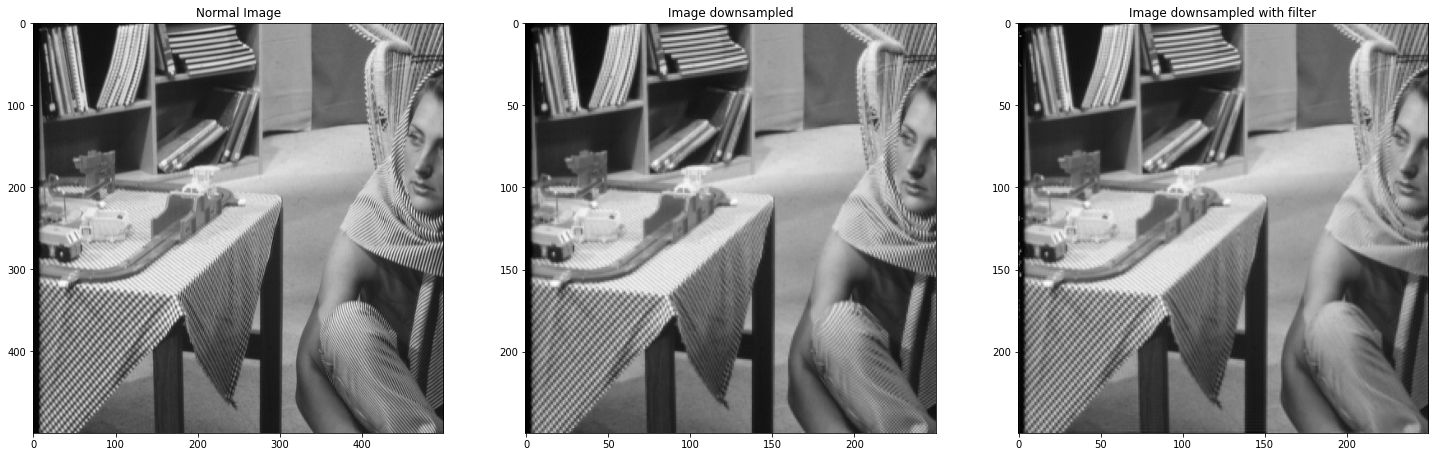

In [11]:
fig, axes = plt.subplots(1,3, figsize = (25,8))
axes[0].imshow(f1, cmap="gray")
axes[0].set_title("Normal Image")
axes[1].imshow(f2, cmap="gray")
axes[1].set_title("Image downsampled")
axes[2].imshow(f2_filter_on, cmap="gray")
axes[2].set_title("Image downsampled with filter")

Podemos ver que en la primer imagen, es decir la imagen sin procesamiento que se ve bien con un tamaño de 500x500, en cambio en la segunda imagen se puede ver aliasing en ciertos lugares de la imagen como por ejemplo en el partalon de Barbara. Esto corre debido a que al realizar el resize de la imagen (el downsampling) sin implementar un filtro pasabajos aparece aliasing, por lo que para evitar este aliasing se muestra en la figura 3 la misma imagen pero filtrada con un filtro pasa bajos previo al downsampling, de esta manera se puede ver cómo el filtro evita el aliasing en los lugares donde antes existía, por ejemplo en el pantalon de Barbara.

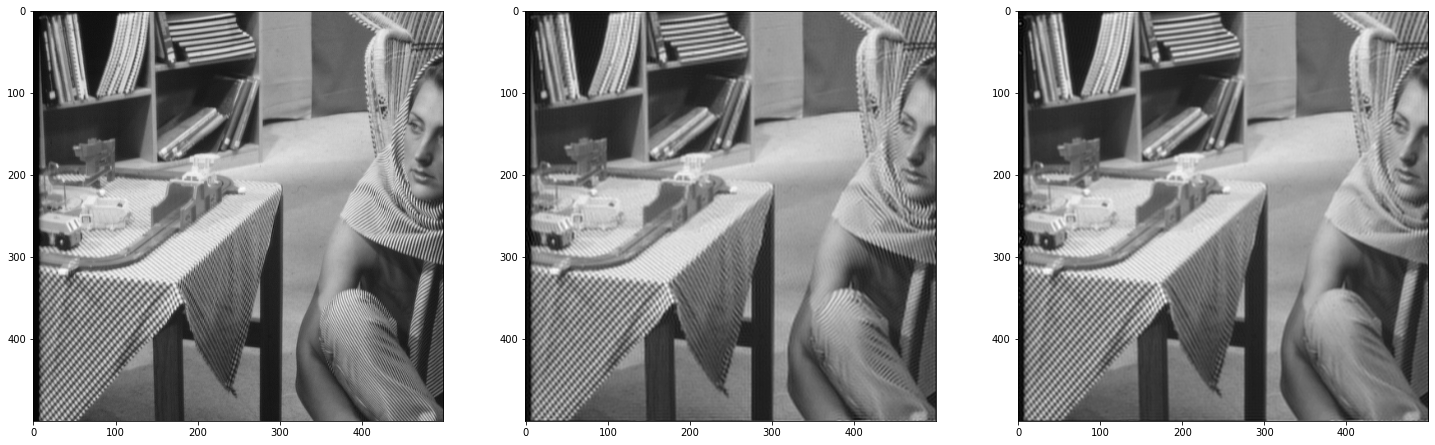

In [12]:
fig, axes = plt.subplots(1,3, figsize = (25,8))
axes[0].imshow(f1, cmap="gray")
axes[1].imshow(f3, cmap="gray")
axes[2].imshow(f3_filter_on, cmap="gray")

En las imágenes superiores podemos ver las imagenes luego del upsampling correspondiente al finalizar el downsampling realizado. Se puede ver como la segunda imagen presenta el aliasing ya descripto porque se deriva de hacer el upsampling de la imagen downsampleada sin el filtro pasa bajos, en cambio en la ultima imagen se puede ver el upsampling realizado con la imagen que implementó el downsampling con el filtro pasa bajos. de esta manera se puede ver que ya no presenta aliasing pero tambien podemos apreciar que perdimos cierta capacidad de detalle respecto de la foto origianal, esto se debe al downsampling y el upsampling generado en la primer imágen.
Se puede ver mejor esto en sectores como los del pañuelo de Barbara donde no se pueden apreceiar bien las líneas verticales que sí se podían ver en el mismo pañuelo en la primer fotografía.